#### 자연어 처리
- 수집
- 정제 및 토큰화
- 불용어 / 구두점 제거
- 단어 사전 => 토큰 : 숫자 맵핑 진행
- 데이터의 수치화

- [1] 모듈 로딩 및 데이터 준비 <hr>

In [79]:
# 모듈 로딩
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize

In [80]:
# 데이터 준비
TEXT_FILE = '../Data/corpus_data.txt'

In [81]:
# 파일에서 데이터 추출 => 'rt': 파일 읽기의 기본 모드값 (default)
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 읽을 데이터 사이즈 지정한 만큼 읽기
    text_data100=f.read(100)
    # f.seek(0) # 커서의 위치를 다시 처음으로 보냄
    text_data=f.read()

In [82]:
len(text_data100), len(text_data) # 총 길이 42053

(100, 41953)

In [83]:
# 파일에서 데이터 추출 => 'rt': 파일 읽기의 기본 모드값 (default)
# 라인 단위로 읽기 => readline()
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    all_data=[]
    while True:
        # *한 줄*씩('\n') 읽기
        text_data=f.readline()
        if not text_data: 
            break
        else:
            all_data.append(text_data)

In [84]:
print(f'text_data: {len(text_data)}개, {text_data}')
print(f'all_data: {len(all_data)}개, {all_data}')

text_data: 0개, 
all_data: 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian news

In [85]:
# 파일에서 데이터 추출 => 'rt': 파일 읽기의 기본 모드값 (default)
# 라인 단위로 *전체* 읽기 => readlines()
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 한 줄씩('\n') 전체 읽어서 리스트에 담아서 반환
    text_data=f.readlines()

In [86]:
print(f'text_data: {len(text_data)}개, {text_data}')

text_data: 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offerin

In [87]:
# for text in text_data: print(text)
[print(text) for text in text_data]

"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).



The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]

The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.



Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offering a reward for information. In 1866, a 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

[2] 데이터 전처리 <hr>

- 줄바꿈 문자('\n') 처리

In [88]:
# ex) ['abcabc\n','\n','aaaa dfdf\n']
all_text=[]
for text in text_data[::-1]:
    text=text.replace('\n','')
    if len(text): all_text.append(text)
print(f'all_text: {len(all_text)}개')

all_text: 87개


- 대소문자 통일

In [89]:
# all_text=[text.lower() for text in all_text]
## (for ~ in ) : 제너레이터 (Generator) 생성
# all_text=(text.lower() for text in all_text)

In [90]:
all_text

['Woodruff submits that the legal verdicts, although fair given the evidence before the courts, have not fully resolved the "great doubt" that Cockburn admitted hung over the case. Woodruff wrote in 1957: "Probably for ever, now, its key long since lost... a mystery remains".[132] A 1998 article in The Catholic Herald suggested that DNA profiling might resolve the mystery.[133] The enigma has launched numerous retellings of the story in book and film, including the short story "Tom Castro, the Implausible Imposter" from Jorge Luis Borges\'s Universal History of Infamy,[134] and David Yates\'s 1998 film The Tichborne Claimant.[135] Thus, Woodruff concludes, "the man who lost himself still walks in history, with no other name than that which the common voice of his day accorded him: the Claimant".[132][n 14]',
 "Attempts have been made to reconcile some of the troubling uncertainties and contradictions within the case. To explain the degree of facial resemblance (which even Cockburn acce

In [110]:
for _ in all_text:
    print(_)

Woodruff submits that the legal verdicts, although fair given the evidence before the courts, have not fully resolved the "great doubt" that Cockburn admitted hung over the case. Woodruff wrote in 1957: "Probably for ever, now, its key long since lost... a mystery remains".[132] A 1998 article in The Catholic Herald suggested that DNA profiling might resolve the mystery.[133] The enigma has launched numerous retellings of the story in book and film, including the short story "Tom Castro, the Implausible Imposter" from Jorge Luis Borges's Universal History of Infamy,[134] and David Yates's 1998 film The Tichborne Claimant.[135] Thus, Woodruff concludes, "the man who lost himself still walks in history, with no other name than that which the common voice of his day accorded him: the Claimant".[132][n 14]
Attempts have been made to reconcile some of the troubling uncertainties and contradictions within the case. To explain the degree of facial resemblance (which even Cockburn accepted) of

- 토큰화

In [111]:
all_tokens=[]
for text in all_text:
    # print(wordpunct_tokenize(text))
    all_tokens.append( wordpunct_tokenize(text) )

In [112]:
print(f'all_tokens => {len(all_tokens)}개')

all_tokens => 87개


- 불용어 & 구두점 제거

In [113]:
## 불용어/구두점 추출
from nltk.corpus import stopwords
import string

eng_stopwords = stopwords.words('english')
punc = list(string.punctuation)

In [114]:
# 불용어, 구두점, 길이 짧은 토큰 삭제
for tokenList in all_tokens:
    for token in tokenList[::-1]:
        if token.isnumeric(): # 숫자형태인 데이터 제거
            tokenList.remove(token)
        elif (token in eng_stopwords) or (token in punc) or (len(token) <= 2):
            tokenList.remove(token)

In [115]:
for tokenList in all_tokens:
    print(tokenList)

['Woodruff', 'submits', 'legal', 'verdicts', 'although', 'fair', 'given', 'evidence', 'courts', 'fully', 'resolved', 'great', 'doubt', 'Cockburn', 'admitted', 'hung', 'case', 'Woodruff', 'wrote', 'Probably', 'ever', 'key', 'long', 'since', 'lost', '...', 'mystery', 'remains', '".[', 'article', 'The', 'Catholic', 'Herald', 'suggested', 'DNA', 'profiling', 'might', 'resolve', 'mystery', 'The', 'enigma', 'launched', 'numerous', 'retellings', 'story', 'book', 'film', 'including', 'short', 'story', 'Tom', 'Castro', 'Implausible', 'Imposter', 'Jorge', 'Luis', 'Borges', 'Universal', 'History', 'Infamy', 'David', 'Yates', 'film', 'The', 'Tichborne', 'Claimant', 'Thus', 'Woodruff', 'concludes', 'man', 'lost', 'still', 'walks', 'history', 'name', 'common', 'voice', 'day', 'accorded', 'Claimant', '".[']
['Attempts', 'made', 'reconcile', 'troubling', 'uncertainties', 'contradictions', 'within', 'case', 'explain', 'degree', 'facial', 'resemblance', 'even', 'Cockburn', 'accepted', 'Claimant', 'Tichb

- 단어별 빈도수 계산

In [97]:
# from collections import Counter
# token_freg2=[]
# for tokenList in all_tokens:
#     token_freg2.append(Counter(tokenList))
# token_freg2

In [122]:
# 토큰을 키로 해서 빈도수 저장
token_freg={} # dict에서는 key값을 찾아봄

# 라인(줄)별 토큰을 읽어서 빈도 체크
for tokenList in all_tokens:
    for token in tokenList:
        # 카운트시, 토큰 key가 존재하지 않으면 key 추가
        if token not in token_freg:
            token_freg[token] = 1
        # 카운트시, 이미 존재하는 토큰 key는 1 증가
        else:
            token_freg[token] += 1

In [117]:
token_freg

{'Woodruff': 5,
 'submits': 1,
 'legal': 12,
 'verdicts': 1,
 'although': 11,
 'fair': 2,
 'given': 5,
 'evidence': 11,
 'courts': 3,
 'fully': 1,
 'resolved': 1,
 'great': 2,
 'doubt': 2,
 'Cockburn': 10,
 'admitted': 1,
 'hung': 1,
 'case': 23,
 'wrote': 4,
 'Probably': 1,
 'ever': 2,
 'key': 2,
 'long': 5,
 'since': 4,
 'lost': 7,
 '...': 2,
 'mystery': 2,
 'remains': 2,
 '".[': 11,
 'article': 1,
 'The': 66,
 'Catholic': 4,
 'Herald': 1,
 'suggested': 3,
 'DNA': 1,
 'profiling': 1,
 'might': 6,
 'resolve': 1,
 'enigma': 1,
 'launched': 4,
 'numerous': 2,
 'retellings': 1,
 'story': 4,
 'book': 1,
 'film': 4,
 'including': 9,
 'short': 2,
 'Tom': 1,
 'Castro': 15,
 'Implausible': 1,
 'Imposter': 1,
 'Jorge': 1,
 'Luis': 1,
 'Borges': 1,
 'Universal': 1,
 'History': 1,
 'Infamy': 1,
 'David': 1,
 'Yates': 1,
 'Tichborne': 97,
 'Claimant': 115,
 'Thus': 1,
 'concludes': 1,
 'man': 4,
 'still': 1,
 'walks': 1,
 'history': 3,
 'name': 14,
 'common': 1,
 'voice': 1,
 'day': 1,
 'accorded

In [102]:
### 빈도별로 몇 개의 단어가 존재하는지 체크
token_freg.items()

dict_items([('Woodruff', 5), ('submits', 1), ('legal', 12), ('verdicts', 1), ('although', 11), ('fair', 2), ('given', 5), ('evidence', 11), ('courts', 3), ('fully', 1), ('resolved', 1), ('great', 2), ('doubt', 2), ('Cockburn', 10), ('admitted', 1), ('hung', 1), ('case', 23), ('wrote', 4), ('Probably', 1), ('ever', 2), ('key', 2), ('long', 5), ('since', 4), ('lost', 7), ('...', 2), ('mystery', 2), ('remains', 2), ('".[', 11), ('article', 1), ('The', 66), ('Catholic', 4), ('Herald', 1), ('suggested', 3), ('DNA', 1), ('profiling', 1), ('might', 6), ('resolve', 1), ('enigma', 1), ('launched', 4), ('numerous', 2), ('retellings', 1), ('story', 4), ('book', 1), ('film', 4), ('including', 9), ('short', 2), ('Tom', 1), ('Castro', 15), ('Implausible', 1), ('Imposter', 1), ('Jorge', 1), ('Luis', 1), ('Borges', 1), ('Universal', 1), ('History', 1), ('Infamy', 1), ('David', 1), ('Yates', 1), ('Tichborne', 97), ('Claimant', 115), ('Thus', 1), ('concludes', 1), ('man', 4), ('still', 1), ('walks', 1),

In [103]:
# value값이 완전히 unique 한 경우에서만 서로 변경 가능
# {v:k for k, v in token_freg.items()}

{5: 'Henriette',
 1: 'see',
 12: 'one',
 11: 'London',
 2: 'radical',
 3: 'couple',
 10: 'Bogle',
 23: 'Sir',
 4: 'heir',
 7: 'butcher',
 66: 'The',
 6: 'March',
 9: 'civil',
 15: 'trial',
 97: 'Tichborne',
 115: 'Claimant',
 14: 'Wagga',
 32: 'family',
 41: 'Orton',
 62: 'Roger',
 13: 'Doughty',
 8: 'Thomas',
 22: 'Kenealy',
 17: 'years',
 16: 'court',
 19: 'Lady',
 18: 'son'}

In [106]:
# 단어들 별로 빈도수 저장
freqsDict={}
for k, v in token_freg.items():
    if v not in freqsDict:
        freqsDict[v]=[k]
    else:
        freqsDict[v].append(k)
print(freqsDict)

{5: ['Woodruff', 'given', 'long', 'pounds', 'small', 'failed', 'allowed', 'Association', 'British', 'class', 'February', 'year', 'several', 'declared', 'perjury', 'January', 'included', 'taken', 'Melbourne', 'time', 'Melipilla', 'heard', 'criminal', 'though', 'team', 'months', 'meet', 'When', 'face', 'asked', 'South', 'America', 'said', 'income', 'Valparaíso', 'born', 'Foster', 'Alfred', 'Henriette'], 1: ['submits', 'verdicts', 'fully', 'resolved', 'admitted', 'hung', 'Probably', 'article', 'Herald', 'DNA', 'profiling', 'resolve', 'enigma', 'retellings', 'book', 'Tom', 'Implausible', 'Imposter', 'Jorge', 'Luis', 'Borges', 'Universal', 'History', 'Infamy', 'David', 'Yates', 'Thus', 'concludes', 'still', 'walks', 'common', 'voice', 'day', 'accorded', 'reconcile', 'troubling', 'uncertainties', 'contradictions', 'explain', 'facial', 'illegitimate', 'grandfather', 'alternative', 'half', 'brothers', 'versions', 'crime', 'killing', 'assuming', 'Agnes', 'killed', 'disclose', 'theories', 'procl

In [ ]:
# # 빈도수별로 단어 또는 단어 개수 저장
# freqsDict={}
# for k, v in token_freg.items():
#     if v not in freqsDict:
#         freqsDict[v]=[k]
#         freqsDict[v]=1
#     else:
#         freqsDict[v].append(k)
#         freqsDict[v]+=1
# print(freqsDict)

In [109]:
# 단어등장 횟수, 단어 개수 및 단어이름 별로 빈도수 저장
freqsDict={}
for k, v in token_freg.items():
    if v not in freqsDict:
        # freqsDict[v]=[k]
        # freqsDict[v]=1
        freqsDict[v]=[1, [k]]
    else:
        # freqsDict[v].append(k)
        # freqsDict[v]+=1
        freqsDict[v][1].append(k)
        freqsDict[v][0]+=1
print(freqsDict)

{5: [39, ['Woodruff', 'given', 'long', 'pounds', 'small', 'failed', 'allowed', 'Association', 'British', 'class', 'February', 'year', 'several', 'declared', 'perjury', 'January', 'included', 'taken', 'Melbourne', 'time', 'Melipilla', 'heard', 'criminal', 'though', 'team', 'months', 'meet', 'When', 'face', 'asked', 'South', 'America', 'said', 'income', 'Valparaíso', 'born', 'Foster', 'Alfred', 'Henriette']], 1: [1134, ['submits', 'verdicts', 'fully', 'resolved', 'admitted', 'hung', 'Probably', 'article', 'Herald', 'DNA', 'profiling', 'resolve', 'enigma', 'retellings', 'book', 'Tom', 'Implausible', 'Imposter', 'Jorge', 'Luis', 'Borges', 'Universal', 'History', 'Infamy', 'David', 'Yates', 'Thus', 'concludes', 'still', 'walks', 'common', 'voice', 'day', 'accorded', 'reconcile', 'troubling', 'uncertainties', 'contradictions', 'explain', 'facial', 'illegitimate', 'grandfather', 'alternative', 'half', 'brothers', 'versions', 'crime', 'killing', 'assuming', 'Agnes', 'killed', 'disclose', 'theo

In [118]:
# [(단어나온 횟수, [단어개수, [단어이름]]) ...]
sorted(freqsDict.items(), reverse=True)

[(115, [1, ['Claimant']]),
 (97, [1, ['Tichborne']]),
 (66, [1, ['The']]),
 (62, [1, ['Roger']]),
 (41, [1, ['Orton']]),
 (32, [1, ['family']]),
 (23, [2, ['case', 'Sir']]),
 (22, [2, ['Arthur', 'Kenealy']]),
 (19, [1, ['Lady']]),
 (18, [1, ['son']]),
 (17, [1, ['years']]),
 (16, [1, ['court']]),
 (15, [2, ['Castro', 'trial']]),
 (14, [2, ['name', 'Wagga']]),
 (13, [4, ['Australia', 'England', 'would', 'Doughty']]),
 (12, [3, ['legal', 'After', 'one']]),
 (11,
  [10,
   ['although',
    'evidence',
    '".[',
    'Henry',
    'James',
    'Edward',
    'witnesses',
    'former',
    'information',
    'London']]),
 (10, [4, ['Cockburn', 'accepted', 'May', 'Bogle']]),
 (9, [6, ['including', 'died', 'support', 'John', 'ship', 'civil']]),
 (8,
  [13,
   ['identity',
    'could',
    'details',
    'supporters',
    'first',
    'His',
    'later',
    'two',
    'became',
    'Hawkins',
    'Wapping',
    'Ballantine',
    'Thomas']]),
 (7,
  [18,
   ['lost',
    'made',
    'Onslow',
   

[3] 단어집합/단어사전 생성 <hr>
* 단어:숫자 매핑
* 나의 데이터셋을 숫자로 변환하기 위한 인코딩(Encodig) 표(table)
* 문장 => 수치화 진행 시 길이를 동일하게 맞추는 작업 즉, 패딩
    * 패딩에 사용되는 토큰, 키는 'PAD', 값은 0
* 테스트 또는 검증에 입력되는 텍스트 ==> 단어사전/집합에 존재하지 않는 단어
    - 존재하지 않는 토큰, 키는 'OOV' 또는 'UNK', 값은 1

In [124]:
## 빈도가 높게 나오는 순서대로 단어 정렬
#                k, v -----------------------------|
storedTokens=sorted(token_freg.items(), reverse=True, key=lambda x:x[1])

In [125]:
## 단어사전 생성 및 초기화
## 특수토큰 : 'PAD', 'OOV' 또는 'UNK'
PAD_TOKEN, OOV_TOKEN='PAD', 'OOV'
vocab={PAD_TOKEN:0, OOV_TOKEN:1}

In [131]:
## 데이터 코퍼스에서 추출된 토큰(단어)들
# vocab[]

for idx, tk in enumerate(storedTokens, 2):
    vocab[tk[0]] = idx
print(vocab)

{'PAD': 0, 'OOV': 1, 'Claimant': 2, 'Tichborne': 3, 'The': 4, 'Roger': 5, 'Orton': 6, 'family': 7, 'case': 8, 'Sir': 9, 'Arthur': 10, 'Kenealy': 11, 'Lady': 12, 'son': 13, 'years': 14, 'court': 15, 'Castro': 16, 'trial': 17, 'name': 18, 'Wagga': 19, 'Australia': 20, 'England': 21, 'would': 22, 'Doughty': 23, 'legal': 24, 'After': 25, 'one': 26, 'although': 27, 'evidence': 28, '".[': 29, 'Henry': 30, 'James': 31, 'Edward': 32, 'witnesses': 33, 'former': 34, 'information': 35, 'London': 36, 'Cockburn': 37, 'accepted': 38, 'May': 39, 'Bogle': 40, 'including': 41, 'died': 42, 'support': 43, 'John': 44, 'ship': 45, 'civil': 46, 'identity': 47, 'could': 48, 'details': 49, 'supporters': 50, 'first': 51, 'His': 52, 'later': 53, 'two': 54, 'became': 55, 'Hawkins': 56, 'Wapping': 57, 'Ballantine': 58, 'Thomas': 59, 'lost': 60, 'made': 61, 'Onslow': 62, 'Mary': 63, 'daughter': 64, 'William': 65, 'Sydney': 66, 'remained': 67, 'found': 68, 'April': 69, 'much': 70, 'Katherine': 71, 'called': 72, 'Be

In [136]:
## 텍스트 문장 ===> 수치화 [인코딩]
encodingData=[]
for tokenList in all_tokens:
    sent=[]
    print(f'문장: {tokenList}')
    for token in tokenList:
        sent.append(vocab[token])
    
    # 인코딩 된 문장 저장
    # all_tokens.append(sent) >> ?
    encodingData.append(sent)
    print(f'==>인코딩: {sent}\n')

문장: ['Woodruff', 'submits', 'legal', 'verdicts', 'although', 'fair', 'given', 'evidence', 'courts', 'fully', 'resolved', 'great', 'doubt', 'Cockburn', 'admitted', 'hung', 'case', 'Woodruff', 'wrote', 'Probably', 'ever', 'key', 'long', 'since', 'lost', '...', 'mystery', 'remains', '".[', 'article', 'The', 'Catholic', 'Herald', 'suggested', 'DNA', 'profiling', 'might', 'resolve', 'mystery', 'The', 'enigma', 'launched', 'numerous', 'retellings', 'story', 'book', 'film', 'including', 'short', 'story', 'Tom', 'Castro', 'Implausible', 'Imposter', 'Jorge', 'Luis', 'Borges', 'Universal', 'History', 'Infamy', 'David', 'Yates', 'film', 'The', 'Tichborne', 'Claimant', 'Thus', 'Woodruff', 'concludes', 'man', 'lost', 'still', 'walks', 'history', 'name', 'common', 'voice', 'day', 'accorded', 'Claimant', '".[']
==>인코딩: [92, 617, 24, 618, 27, 323, 93, 28, 205, 619, 620, 324, 325, 37, 621, 622, 8, 92, 131, 623, 326, 327, 94, 132, 60, 328, 329, 330, 29, 624, 4, 133, 625, 206, 626, 627, 78, 628, 329, 4, 

[4] 패딩(Padding) <hr>
* 길이가 다른 문장들의 길이를 일치시키기
    * 가장 긴 문장 기준으로 나머지 문장들을 PAD 토큰으로 채우기
    * 개발자 지정 길이를 기준으로 문장들의 길이를 조절
        - 지정 길이보다 긴 경우 : 자르기 (앞/뒤 중 선택)
        - 지정 길이보다 짧은 경우 : PAD 토큰으로 채우기

In [143]:
# 문장들 마다 길이 체크
# max([len(sent) for sent in encodingData])
dataLen=[len(sent) for sent in encodingData]
print(dataLen)

[81, 97, 63, 61, 1, 86, 52, 5, 4, 147, 7, 2, 1, 68, 86, 3, 69, 28, 90, 81, 6, 1, 112, 63, 15, 2, 4, 46, 70, 78, 11, 2, 94, 2, 106, 55, 102, 7, 3, 52, 6, 4, 66, 69, 37, 2, 79, 6, 4, 2, 121, 137, 114, 9, 2, 2, 66, 68, 6, 2, 116, 63, 61, 58, 7, 1, 2, 81, 68, 8, 96, 8, 2, 68, 63, 48, 87, 11, 44, 3, 3, 58, 62, 59, 36, 15, 11]


In [141]:
import matplotlib.pyplot as plt

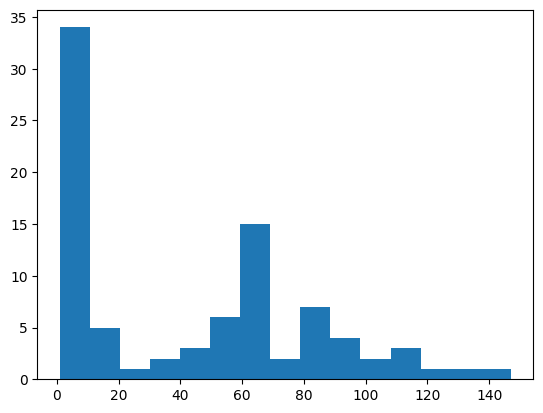

In [145]:
plt.hist(dataLen, bins=15)
plt.show()

In [146]:
## 기준 길이 (가장 긴 길이)
MAX_LENGTH = max(dataLen)
MAX_LENGTH

147

In [150]:
### [1] 가장 긴 문장 길이 기준
for idx, sent in enumerate(encodingData):
    cur_length=len(sent)
    if cur_length < MAX_LENGTH:
        # sent=sent+([0] * (MAX_LENGTH-cur_length)) # 짧은 만큼 0으로 채워줘야함.
        encodingData[idx]=sent+([0] * (MAX_LENGTH-cur_length)) # enumerate로 index 접근

In [151]:
for _ in encodingData[:3]: print(len(_), _)

147 [92, 617, 24, 618, 27, 323, 93, 28, 205, 619, 620, 324, 325, 37, 621, 622, 8, 92, 131, 623, 326, 327, 94, 132, 60, 328, 329, 330, 29, 624, 4, 133, 625, 206, 626, 627, 78, 628, 329, 4, 629, 134, 331, 630, 135, 631, 136, 41, 332, 135, 632, 16, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 136, 4, 3, 2, 643, 92, 644, 137, 60, 645, 646, 207, 18, 647, 648, 649, 650, 2, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
147 [333, 61, 651, 652, 653, 654, 138, 8, 655, 334, 656, 208, 335, 37, 38, 2, 3, 7, 62, 206, 4, 139, 6, 79, 336, 337, 63, 338, 657, 64, 9, 30, 3, 5, 3, 658, 659, 135, 63, 338, 209, 31, 3, 339, 6, 5, 660, 661, 210, 662, 6, 5, 340, 663, 20, 6, 664, 5, 665, 47, 4, 2, 64, 63, 140, 211, 341, 63, 666, 212, 213, 214, 667, 10, 6, 141, 48, 668, 49, 215, 14, 342, 216, 28, 669, 341, 217, 670, 47, 3, 64, 671, 339, 672, 343, 142, 7,

In [ ]:
## 기준 길이 (기준 길이: 100)
MAX_LENGTH = 100
MAX_LENGTH

In [ ]:
### [2] 가장 긴 문장 길이 기준
for idx, sent in enumerate(encodingData):
    cur_length=len(sent)
    if cur_length < MAX_LENGTH:
        # sent=sent+([0] * (MAX_LENGTH-cur_length)) # 짧은 만큼 0으로 채워줘야함.
        encodingData[idx]=sent+([0] * (MAX_LENGTH-cur_length)) # enumerate로 index 접근
    else:
        # 앞부분 제거 시
        encodingData[idx]=sent[cur_length-MAX_LENGTH:]
        
        # 뒷부분 제거 시
        # encodingData[idx]=sent[:MAX_LENGTH]

In [152]:
print(encodingData[0][:-5])

[92, 617, 24, 618, 27, 323, 93, 28, 205, 619, 620, 324, 325, 37, 621, 622, 8, 92, 131, 623, 326, 327, 94, 132, 60, 328, 329, 330, 29, 624, 4, 133, 625, 206, 626, 627, 78, 628, 329, 4, 629, 134, 331, 630, 135, 631, 136, 41, 332, 135, 632, 16, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 136, 4, 3, 2, 643, 92, 644, 137, 60, 645, 646, 207, 18, 647, 648, 649, 650, 2, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [164]:
MAX_LEN = 4
a=[1,2,3,4,5,6,7,8]
print(a[:MAX_LEN])
print(a[len(a)-MAX_LEN:])

[1, 2, 3, 4]
[5, 6, 7, 8]
